## PORESPY EXAMPLE: The Lineal Path Function

In the original version of the lineal path function described by Torquanto, he proposes to insert lines of arbitrary length and oreintation into the image, then count the fraction of these lines that lie wholly within a single phase. If the medium is isotropic, then random orientations are not needed. On the other hand, if the material is anisotropic, then orientation does matter. Flipping this around, we can detect anisotropy in an image by measuring the lineal-path function along a single direction, then repeating for orthogonal directions. Anisotropy is thus revealed by the disparity in the lineal-path results. 

Porespy uses the latter approach, computing the lineal-path function along a single axis. PoresPy includes the distance_transform_lin function, which can compute a version of the distance transform that is limited to the linear distance along the specified axis. Applying this function to an image creates the input data for the lineal path function, which then computes the cumulative distribution function of the values in the image. 

The following example outlines the steps to compute the lineal-path function in two perpendicular directions for an anisotropic image.

In [2]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()

First, we generate an anisotropic image using the blobs generator:

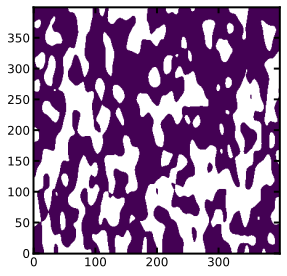

In [3]:
im = ps.generators.blobs([400,400],blobiness=[1,2],porosity=.6)
ps.imshow(im);

Next, the distance_transform_lin function will be applied along the 0 axis.

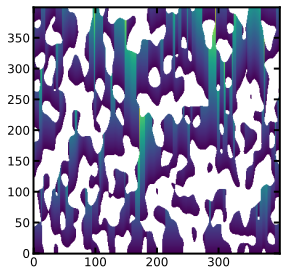

In [4]:
paths = ps.filters.distance_transform_lin(im,mode='forward',axis=0)
ps.imshow(paths);

The greyscale values in the above image represent the length of a path that can be drawn from each voxel to the nearest solid voxel, in the specified direction. In terms of Torquato's definition, each greyscale value represents a random starting point (A) and moving along specified direction until a solid is encountered (solid represents end of line (B)), giving us a path length of A->B. The "counter associated with the distance between A and B is incremented," which corresponds to binning the greyscale values in the above image. In other words, the above representation includes ALL possible starting points on each path, provides us with the largest possible data set. 

With the image now computed, it can be passed to the lineal_path_distribution function, which computes the histogram. The bins were set to a specific range so that they line up with subsequent plots shown below.

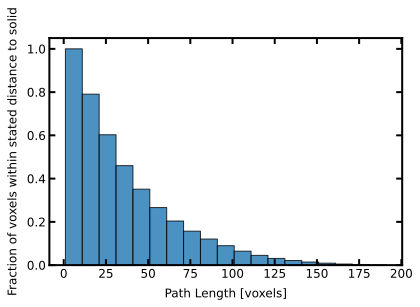

In [9]:
lpf = ps.metrics.lineal_path_distribution(paths, bins = range(1,200,10))
fig, ax = plt.subplots(1,1)
ax.bar(x=lpf.L,height=lpf.cdf,width=lpf.bin_widths,edgecolor='k',alpha=.8)
ax.set_xlabel('Path Length [voxels]')
ax.set_ylabel('Fraction of voxels within stated distance to solid');

Since the image is anisotropic, the process will yield a different result in the perpendicular direction, so repeating the above process with axis=1 instead of 0:

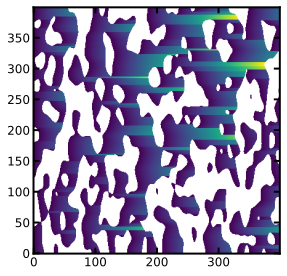

In [11]:
paths = ps.filters.distance_transform_lin(im, mode = 'forward', axis=1)
ps.imshow(paths);

Overlaying the 0,1 axes results on eachother, we get:

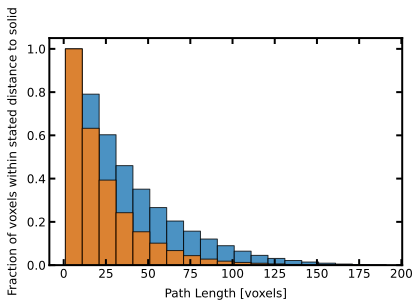

In [12]:
lpf = ps.metrics.lineal_path_distribution(paths,bins=range(1,200,10))
ax.bar(x=lpf.L,height=lpf.cdf, width=lpf.bin_widths, edgecolor='k',alpha=.8);
fig

Here we can clearly see the anisotropy of the image, since the first axis possesses longer lineal-path values then the other access.